<a href="https://colab.research.google.com/github/Kawsikan/deep-learning/blob/main/SE4050_DL_Lab_01(Student).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instructions to Students**


*   Please Follow Instructor Guidelines and upload Complete the below Worksheet
*   Join the Lab 01 Assignment(on Github Classroom we use) using the link handed over to you all by your instructors.
* if your email is not available in the roster of the classroom Please email me(jeewaka.p@sliit.lk)



Loading pyTorch library and numPy

In [ ]:
import torch 
import numpy as np


Initializing Tensors
* using python List
* using numpy Array
* using another Tensor




In [ ]:
#Using List
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [ ]:
#Using numpy Array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [ ]:
#Using other Tensors
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.3780, 0.5318],
        [0.1315, 0.5470]]) 



Getting Tensor Informations

In [ ]:
tensor = torch.rand(3,4)
print(f"Shape of the tensor {tensor.shape}")
print(f"Data type of the tensor {tensor.dtype}")

#Getting Tensor Shape, dType and device info

Shape of the tensor torch.Size([3, 4])
Data type of the tensor torch.float32


Indexing and Extracting data from a Tensor

In [ ]:
tensor = torch.ones(4, 4)

print('First row ',tensor[0])
print('First column ',tensor[:,0])
print('Last column ',tensor[..., -1])

print(tensor)

First row  tensor([1., 1., 1., 1.])
First column  tensor([1., 1., 1., 1.])
Last column  tensor([1., 1., 1., 1.])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


Concaternating Tensors

Arithmatic Operations

In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)



# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)


From numPy to Tensors


In [ ]:
n = np.ones(5)
t = torch.from_numpy(n)
t

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [ ]:
np.add(n, 1, out=n) #changes made to tensor or numPy array will reflect in the other
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


Tensor to NnumPy


In [ ]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


Working with Datasets

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

#Loading Sample Datasets

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()

)


test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Vidualizing images using matplotlib

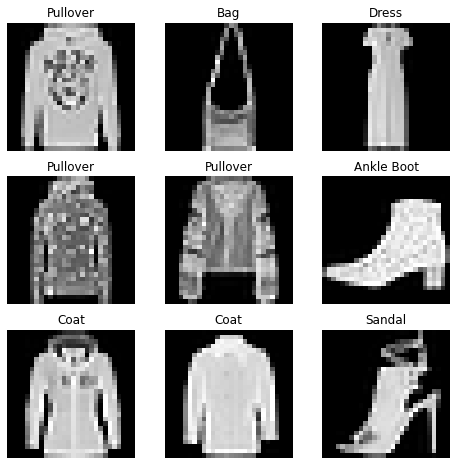

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Loading data with a Dataloader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

Iterating through mini-batches

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


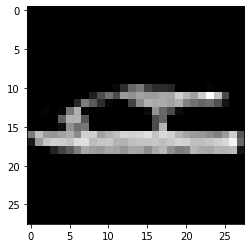

Label: 5


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

Specifing the Device

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


Using cpu device


Defining a NN Model

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.model = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.model(x)
        return logits

Create Model Object

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


GEtting the Output

In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([8])


Getting Model Parameters

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: model.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0349, -0.0356, -0.0107,  ..., -0.0182,  0.0072,  0.0269],
        [ 0.0153,  0.0094,  0.0105,  ...,  0.0296, -0.0351,  0.0241]],
       grad_fn=<SliceBackward0>) 

Layer: model.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0198,  0.0298], grad_fn=<SliceBackward0>) 

Layer: model.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0351, -0.0378,  0.0370,  ..., -0.0208, -0.0038, -0.0212],
        [-0.0330,  0.0363,  0.0079,  ...,  0.0070,  0.0116, -0.0230]],
       grad_fn=<SliceBackward0>) 

Layer: model.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0206, -0.0221]

Model Optimizations

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Full Model

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300180  [    0/60000]
loss: 2.277623  [ 6400/60000]
loss: 2.268751  [12800/60000]
loss: 2.255859  [19200/60000]
loss: 2.228809  [25600/60000]
loss: 2.226165  [32000/60000]
loss: 2.196228  [38400/60000]
loss: 2.193169  [44800/60000]
loss: 2.187292  [51200/60000]
loss: 2.153974  [57600/60000]
Test Error: 
 Accuracy: 51.6%, Avg loss: 2.143214 

Epoch 2
-------------------------------
loss: 2.137610  [    0/60000]
loss: 2.124072  [ 6400/60000]
loss: 2.117539  [12800/60000]
loss: 2.085012  [19200/60000]
loss: 2.015392  [25600/60000]
loss: 1.995729  [32000/60000]
loss: 1.945091  [38400/60000]
loss: 1.957477  [44800/60000]
loss: 1.868989  [51200/60000]
loss: 1.883719  [57600/60000]
Test Error: 
 Accuracy: 58.6%, Avg loss: 1.858226 

Epoch 3
-------------------------------
loss: 1.821557  [    0/60000]
loss: 1.808328  [ 6400/60000]
loss: 1.730001  [12800/60000]
loss: 1.719802  [19200/60000]
loss: 1.756356  [25600/60000]
loss: 1.656685  [32000/600